
# Project: TWITTER DATA WRANGLING  

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gathering">Data Gathering</a></li>
<li><a href="#Accessing">Data Accessing</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">Limitation</a></li>
<li><a href="#references">References</a></li>
</ul>

<li><a href="#intro">INTRODUCTION</a></li>

This project is all about gathering data from three different medium, accessing, cleaning as well as deriving good insight from the data gathereded.
This project case study is twitter dog rating which all the dataset will be gathered from twitter website.

In [119]:
# This code is for importing libray that would be used for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import tweepy
import json
import seaborn as sns

<li><a href="#Gathering">DATA GATHERING</a></li>

**Gathering data by directly downloading WeRateDogs Twitter Archive data(twitter_archive_enhance.csv)**

In [120]:
# This code is for reading of the downloaded dataset  on jupiter notebook using pandas
Enhance_twitter=pd.read_csv('twitter-archive-enhanced.csv')

**Gathering data by using Request Libary to download the tweet image prediction (Image_prediction.tsv)**

In [121]:
# This code is to define the url and get the request using (request.get method) 
url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

image_prediction=requests.get(url)

In [122]:

with open ('folder_name',  mode='wb') as file:
    file.write(image_prediction.content)

In [123]:
# This code is to confirm the request is successfull.
image_prediction

<Response [200]>

In [124]:
# This code is passing the file gotten from the website url to a pandas DataFrame
Image_prediction=pd.read_csv('Image-prediction.tsv', sep= '\t')

**Gathering data by using Tweepy Libary to download additional data (tweet-json.txt)**

In [125]:
# This code is for reading of the txt file 
Tweet_API=[]
with open ('tweet-json (2).txt') as f:
    for line in f:
        Tweet_API.append(json.loads(f.readline()))

In [126]:
# This code is passing the txt file into Pandas DataFrame
Tweet_API=pd.DataFrame(Tweet_API)

<li><a href="#Accessing">DATA ACCESSING</a></li>

#### PROGRAMMATIC AND VISUAL ACCESSMENT OF THE 3 DATASET GATHERED

In [127]:
# To show information about the dataset
Enhance_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Table 1.0 above shows information about the data present in Enhance_twitter dataset per column**

In [128]:
# To show information about the dataset
Image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Table 2.0 above shows information about the data present in image_prediction dataset per column**

In [129]:
# To show information about the dataset
Tweet_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     1177 non-null   object 
 1   id                             1177 non-null   int64  
 2   id_str                         1177 non-null   object 
 3   full_text                      1177 non-null   object 
 4   truncated                      1177 non-null   bool   
 5   display_text_range             1177 non-null   object 
 6   entities                       1177 non-null   object 
 7   extended_entities              1031 non-null   object 
 8   source                         1177 non-null   object 
 9   in_reply_to_status_id          38 non-null     float64
 10  in_reply_to_status_id_str      38 non-null     object 
 11  in_reply_to_user_id            38 non-null     float64
 12  in_reply_to_user_id_str        38 non-null     o

**Table 3.0 above shows information about the data present in Tweet_API dataset per column**

In [130]:
## To show the number of duplicated values in the dataset 
Enhance_twitter.duplicated().sum()

0

In [131]:
# To show the number of duplicated values in the dataset 
Image_prediction.duplicated().sum()

0

In [132]:
# to check the spread of the dataset
Enhance_twitter.shape

(2356, 17)

In [133]:
# to check the spread of the dataset
Image_prediction.shape

(2075, 12)

In [134]:
# to check the spread of the dataset
Tweet_API.shape

(1177, 31)

In [135]:
# To know the number of unique values in each column of the dataset
Enhance_twitter.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

**Table 4.0 above shows the distribution of unique values per each column in the dataset**

In [136]:
# To display the unique values in the dataset
Image_prediction.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

**Table 5.0 above shows the distribution of unique values per each column in the dataset**

In [137]:
# To get the dupilcated column in all the 3 dataset which should only be the ID columns
all_columns=pd.Series(list(Enhance_twitter) + list(Image_prediction) + list (Tweet_API))
all_columns[all_columns.duplicated()]

17                 tweet_id
37                   source
38    in_reply_to_status_id
40      in_reply_to_user_id
dtype: object

**Table 6.0 above shows the duplicated columns across the 3 dataset**

In [138]:
# To get the list of columns in the dataset
list(Enhance_twitter)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**Table 7.0 above shows the list of columns present in the dataset**

In [139]:
# To get the list of columns in the dataset
list(Image_prediction)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

**Table 8.0 above shows the list of columns present in the dataset**

In [140]:
# To get the list of columns in the dataset
list(Tweet_API)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

**Table 9.0 above shows the list of columns present in the dataset**

In [141]:
# To get the nan values in the dataset
Enhance_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

**Table 10.0 above shows the missing values in the columns present in the dataset**

In [142]:
# To get the nan values in the dataset
Image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

**Table 11.0 above shows the missing values in the columns present in the dataset**

In [143]:
# To get the nan values in the dataset
Tweet_API.isnull

<bound method DataFrame.isnull of                           created_at                  id              id_str  \
0     Tue Aug 01 00:17:27 +0000 2017  892177421306343426  892177421306343426   
1     Sun Jul 30 15:58:51 +0000 2017  891689557279858688  891689557279858688   
2     Sat Jul 29 00:08:17 +0000 2017  891087950875897856  891087950875897856   
3     Fri Jul 28 00:22:40 +0000 2017  890729181411237888  890729181411237888   
4     Wed Jul 26 15:59:51 +0000 2017  890240255349198849  890240255349198849   
...                              ...                 ...                 ...   
1172  Mon Nov 16 00:55:59 +0000 2015  666057090499244032  666057090499244032   
1173  Mon Nov 16 00:35:11 +0000 2015  666051853826850816  666051853826850816   
1174  Mon Nov 16 00:24:50 +0000 2015  666049248165822465  666049248165822465   
1175  Sun Nov 15 23:21:54 +0000 2015  666033412701032449  666033412701032449   
1176  Sun Nov 15 22:32:08 +0000 2015  666020888022790149  666020888022790149   

     

**Table 11.0 above shows the missing values in the columns present in the dataset**

In [144]:
# To know the type of data type of each column in the dataset
Tweet_API.dtypes

created_at                        object
id                                 int64
id_str                            object
full_text                         object
truncated                           bool
display_text_range                object
entities                          object
extended_entities                 object
source                            object
in_reply_to_status_id            float64
in_reply_to_status_id_str         object
in_reply_to_user_id              float64
in_reply_to_user_id_str           object
in_reply_to_screen_name           object
user                              object
geo                               object
coordinates                       object
place                             object
contributors                      object
is_quote_status                     bool
retweet_count                      int64
favorite_count                     int64
favorited                           bool
retweeted                           bool
possibly_sensiti

**Table 12.0 above shows the type of data type present in each column of the dataset**

In [145]:
# To know the type of data type of each column in the dataset
Enhance_twitter.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

**Table 13.0 above shows the type of data type present in each column of the dataset**

In [146]:
# To know the type of data type of each column in the dataset
Image_prediction.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

**Table 14.0 above shows the type of data type present in each column of the dataset**

In [147]:
# To gather more information about the dataset
Enhance_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**Table 15.0 above shows statistical information about the dataset**

In [148]:
# To gather more information about the dataset
Image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


**Table 16.0 above shows statistical information about the dataset**

In [149]:
# To gather more information about the dataset
Tweet_API.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,1.177000e+03,3.800000e+01,3.800000e+01,1177.000000,1177.000000,1.400000e+01
mean,7.426493e+17,7.594955e+17,2.211968e+16,3107.338997,7901.181818,8.309848e+17
std,6.851760e+16,7.842538e+16,1.363549e+17,5458.476288,11536.383916,5.251913e+16
min,6.660209e+17,6.671522e+17,1.185634e+07,2.000000,0.000000,7.099191e+17
25%,6.783968e+17,6.834783e+17,2.155841e+08,613.000000,1339.000000,8.015683e+17
50%,7.193678e+17,7.489146e+17,4.196984e+09,1460.000000,3553.000000,8.439624e+17
75%,7.992971e+17,8.400601e+17,4.196984e+09,3628.000000,9872.000000,8.735790e+17
max,8.921774e+17,8.862664e+17,8.405479e+17,79515.000000,131075.000000,8.860534e+17


**Table 17.0 above shows statistical information about the dataset**

In [150]:
# To print out 5 random samples of the dataset
Enhance_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1989,672828477930868736,NaN,NaN,2015-12-04 17:23:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a Timbuk Slytherin. Eats h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672828477...,9,10,Jerry,None,None,None,None
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,None,floofer,None,None
691,787322443945877504,NaN,NaN,2016-10-15 16:01:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lincoln. He forgot to use his blinker ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787322443...,10,10,Lincoln,None,None,None,None
312,835264098648616962,NaN,NaN,2017-02-24 23:04:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. Her hobbies include being precious ...,NaN,NaN,NaN,https://www.gofundme.com/lolas-life-saving-sur...,12,10,Lola,None,None,None,None
1717,680191257256136705,NaN,NaN,2015-12-25 01:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy Christmas pupper 11/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680191257...,11,10,None,None,None,pupper,None


**Table 18.0 above shows the print out of 5 random sample of the dataset**

In [151]:
# To print out 5 random samples of the dataset
Image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1519,787717603741622272,https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg,3,German_shepherd,0.992339,True,malinois,0.004920,True,kelpie,0.000853,True
1207,742161199639494656,https://pbs.twimg.com/media/CkyvqnNWYAQxQY1.jpg,1,balloon,0.990736,False,punching_bag,0.004754,False,parachute,0.000436,False
973,706681918348251136,https://pbs.twimg.com/media/Cc6jcYRXIAAFuox.jpg,1,toy_poodle,0.717584,True,miniature_poodle,0.151433,True,Norwich_terrier,0.047087,True
397,673662677122719744,https://pbs.twimg.com/media/CVlUfBbUwAQyfcD.jpg,1,Labrador_retriever,0.957670,True,beagle,0.012413,True,golden_retriever,0.005689,True
1063,715342466308784130,https://pbs.twimg.com/media/Ce1oLNqWAAE34w7.jpg,1,West_Highland_white_terrier,0.597111,True,soft-coated_wheaten_terrier,0.142993,True,Lakeland_terrier,0.136712,True


**Table 19.0 above shows the print out of 5 random sample of the dataset**

In [152]:
# To print out 5 random samples of the dataset
Tweet_API.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
841,Tue Dec 29 01:52:46 +0000 2015,681654059175129088,681654059175129088,This is Toffee. He's a happy pupper. Appears d...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 681654055031189505, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2903,False,False,False,False,en,NaN,NaN,NaN,NaN
585,Wed Apr 13 19:59:42 +0000 2016,720340705894408192,720340705894408192,This is Derek. He just got balled on. Can't ev...,False,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 720340697887457281, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3131,False,False,False,False,en,NaN,NaN,NaN,NaN
258,Mon Dec 19 01:26:42 +0000 2016,810657578271330305,810657578271330305,This is Pavlov. His floatation device has fail...,False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 810657562332954624, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12192,False,False,False,False,en,NaN,NaN,NaN,NaN
819,Mon Jan 04 21:23:02 +0000 2016,684122891630342144,684122891630342144,Heartwarming scene of two pups that want nothi...,False,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 684122864098885634, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2176,False,False,False,False,en,NaN,NaN,NaN,NaN
966,Mon Dec 07 23:33:58 +0000 2015,674008982932058114,674008982932058114,This pup is sad bc he didn't get to be the toy...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674008948689657856, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1297,False,False,False,False,en,NaN,NaN,NaN,NaN


**Table 20.0 above shows the print out of 5 random sample of the dataset**

In [153]:
# To check the values of the rating_ numerator column in the dataset
Enhance_twitter.rating_numerator.value_counts

<bound method IndexOpsMixin.value_counts of 0       13
1       13
2       12
3       13
4       12
        ..
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2356, dtype: int64>

**The Table above is to check for the values of the rating numerator of the dataset for correct rating**

In [154]:
# To check the values of the rating_ numerator column in the dataset
Enhance_twitter.rating_denominator.value_counts

<bound method IndexOpsMixin.value_counts of 0       10
1       10
2       10
3       10
4       10
        ..
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2356, dtype: int64>

**The Table above is to check for the values of the rating denominator of the dataset for correct rating**

<li><a href="#Cleaning">DATA CLEANING</a></li>

#### DATA QUALITY

#### Defining the Data Quality problems that needs to be worked on in the Dataset
1.  Removal of in reply to status id, in reply to status user id, retweeted status id,retweeted status user id,retweeted status timestamp,lang, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status, id str, entities extended_entities,display_text_range and truncated column
2.  Dropping of the null values in the 3 dataset
3.  Data type of Timestamp, created_at are object which supposed to be datetime 
4.  Renaming timestamp column to Date, create_at to timestamp and id to tweet_id column header p1, p1_conf,p2_conf, p2,p3,p3_conf,p1_dog,p2_dog and p3_dog
5.  Stripping off of href infront of source column needs to be removed from Tweet_API_clean and Enhance_twitter_clean
6. Stripping off of Time from date in both dataset Enhance_twitter_clean and Tweet_twitter_clean
7. Arranging the date and text column in Enhance_twitter_clean and Tweet_API_clean dataset
8. Dropping of the null values in the 3 dataset
9. Renaming missing values in name column from None to NaN and remove all rows with any NaN values
10. Some tweet has no pictures which needs to be removed
11. Some rating numerators are incorrect because they are below the range usually given(lower than 10 and greater than 13)
12. Remove retweet from the json file by removing all rows where retweet_status is not null





### Tidiness

### Defining the Data Tidiness problems that needs to be worked on in the Dataset
 
1. Merging the three dataset together to be a master dataset.
2. Merge each dog status column into a one column and named it Stage and remove the duplicated values
3. The rating numerators as well as the denomintaor column need to be a single column called Ratings


## Cleaning Data Quality Problems

**Code**

In [155]:
# To make a copy of the original dataset before cleaning
Enhance_twitter_clean=Enhance_twitter.copy()
Tweet_API_clean=Tweet_API.copy()
Image_prediction_clean=Image_prediction.copy()

**Define**
- Remove retweet from the json file by removing all rows where retweet_status is not null

**Code**

In [156]:
# This removes the retweets in the tweet json by removing all rows where retweet_status is not null. 
print(Tweet_API_clean['retweeted_status'].notnull().sum())
Tweet_API_clean =Tweet_API_clean [Tweet_API_clean['retweeted_status'].isna()]

92


**Test**

In [157]:
# Below checks the retweets have been effectively removed.
Tweet_API_clean['retweeted_status'].notnull().sum()

0

***Define***
- Removal of in reply to status id, in reply to status user id, retweeted status id,retweeted status user id,retweeted status timestamp

**Code**

In [158]:
# This code is to drop some column that is not needed in the dataset
Enhance_twitter_clean=Enhance_twitter_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1 )

**Test**

In [159]:
Enhance_twitter_clean.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None


**Table 21.0 above shows the print out of the remaining columns in the dataset after dropping some columns**

***Define***
- Dropping of lang, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status, id str, entities extended_entities,display_text_range and truncated column

**Code**

In [160]:
# This code is to drop some column that is not needed in the dataset
Tweet_API_clean=Tweet_API_clean.drop(['truncated','display_text_range','entities', 'extended_entities', 'id_str' , 'in_reply_to_status_id', 'lang', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'user', 'coordinates', 'is_quote_status', 'in_reply_to_screen_name', 'in_reply_to_user_id_str', 'in_reply_to_user_id', 'in_reply_to_status_id_str','geo','place','contributors' ], axis=1)

**Test**

In [161]:
#This code is to display the result of column dropped 
Tweet_API_clean.head(1)

,created_at,id,full_text,source,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable
0,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819,False,False,False,False


**Table 22.0 above shows the print out of the remaining columns in the dataset after dropping some columns**

***Define***
- Dropping of the null values in the 3 dataset

**Code**

In [162]:
# drop rows with any null values
Enhance_twitter_clean=Enhance_twitter_clean.dropna(axis=1)

**Test**

In [163]:
# To display the result of change made
Enhance_twitter_clean.head(4)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None


**Table 23.0 above shows the print out of checking the NaN values in dataset**

**Code**

In [164]:
# drop rows with any null values
Tweet_API_clean=Tweet_API_clean.dropna(axis=1)

**Test**

In [165]:
Tweet_API_clean

,created_at,id,full_text,source,retweet_count,favorite_count,favorited,retweeted
0,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819,False,False
1,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908,False,False
2,Sat Jul 29 00:08:17 +0000 2017,891087950875897856,Here we have a majestic great white breaching ...,"<a href=""http://twitter.com/download/iphone"" r...",3261,20562,False,False
3,Fri Jul 28 00:22:40 +0000 2017,890729181411237888,When you watch your owner call another dog a g...,"<a href=""http://twitter.com/download/iphone"" r...",16716,56848,False,False
4,Wed Jul 26 15:59:51 +0000 2017,890240255349198849,This is Cassie. She is a college pup. Studying...,"<a href=""http://twitter.com/download/iphone"" r...",7711,32467,False,False
...,...,...,...,...,...,...,...,...
1172,Mon Nov 16 00:55:59 +0000 2015,666057090499244032,My oh my. This is a rare blond Canadian terrie...,"<a href=""http://twitter.com/download/iphone"" r...",146,304,False,False
1173,Mon Nov 16 00:35:11 +0000 2015,666051853826850816,This is an odd dog. Hard on the outside but lo...,"<a href=""http://twitter.com/download/iphone"" r...",879,1253,False,False
1174,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,"<a href=""http://twitter.com/download/iphone"" r...",41,111,False,False
1175,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,Here is a very happy pup. Big fan of well-main...,"<a href=""http://twitter.com/download/iphone"" r...",47,128,False,False


**Table 24.0 above shows the print out of checking the NaN values in dataset**

**Code**

In [166]:
# drop rows with any null values
Image_prediction_clean=Image_prediction_clean.dropna(axis=1)

**Test**

In [167]:
Image_prediction_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


**Table 25.0 above shows the print out of checking the NaN values in dataset**

***Define*** 
- Data type of Timestamp is object which supposed to be datetime

**Code**

In [168]:
# This code is to convert timestamp column from object to datetime format
timestamp=Enhance_twitter_clean['timestamp']= pd.to_datetime(Enhance_twitter_clean['timestamp'])

**Test**

In [169]:
# This code is to display of the change in converting the timestamp column from oject to datetime format
Enhance_twitter_clean['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

**Table 26.0 above shows the print out of the change made on timestamp data type**

***Define***
- Data type of created_at is object which supposed to be datetime

**Code**

In [170]:
# This code is to convert created_at column from object to datetime format
Tweet_API_clean['created_at'] =Tweet_API_clean['created_at'].astype('datetime64[ns]')

**Test**

In [171]:
# This code is to display of the change in converting the created_at column from oject to datetime format
Tweet_API_clean.head(2)

,created_at,id,full_text,source,retweet_count,favorite_count,favorited,retweeted
0,2017-08-01 00:17:27,892177421306343426,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819,False,False
1,2017-07-30 15:58:51,891689557279858688,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908,False,False


**Table 27.0 above shows the print out of the data type conversion done on created_at column in the dataset**

***Define***
- Renaming timestamp column to Date

**Code**

In [172]:
# This code is to rename tweet_id to id
tweet_id=Enhance_twitter_clean.rename(columns={ 'timestamp' : 'date'}, inplace=True)

**Test**

In [173]:
# This code is to display the change of renaming tweet_id to id
Enhance_twitter_clean.head(1)

,tweet_id,date,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


**Table 28.0 above shows the print out of the renaming done on timestamp column dataset**

***Define***
- Renaning of create_at to timestamp and id to tweet_id

**Code**

In [174]:
# This code is to rename create_at and id columns respectively in the dataset
created_at=Tweet_API_clean.rename(columns={'created_at' : 'date', 'id' :'tweet_id'}, inplace=True)

**Test**

In [175]:
#This code is to display the renamining change
Tweet_API_clean.head(1)

,date,tweet_id,full_text,source,retweet_count,favorite_count,favorited,retweeted
0,2017-08-01 00:17:27,892177421306343426,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819,False,False


**Table 29.0 above shows the print out of the renaming done on created_at to date and id to tweet_id column respectively in the dataset**

***Define***
-  Renaming of column header  p1, p1_conf,p2_conf, p2,p3,p3_conf,p1_dog,p2_dog and p3_dog

**Code**

In [176]:
# This code is to rename some columns in the dataset
Image_prediction_clean=Image_prediction_clean.rename(columns={'p1' : 'prediction_image', 'p1_conf':'prediction1_confidence', 'p2_conf':'prediction2_confidence', 'p1_dog':'prediction1_dog','p2':'prediction2_image','p2_conf':'prediction2_confidence','p2_dog':'prediction2_dog','jpg_url':'image_url', 'p3':'Prediction3_image','p3_conf':'prediction3_confidence', 'p3_dog':'prediction3_dog',})

**Test**

In [177]:
#This code is to display the renamining change 
Image_prediction_clean.head(1)

,tweet_id,image_url,img_num,prediction_image,prediction1_confidence,prediction1_dog,prediction2_image,prediction2_confidence,prediction2_dog,Prediction3_image,prediction3_confidence,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


**Table 30.0 Table 26.0 above shows the print out of the renaming done on some columns in the dataset**

***Define***
- Stripping off of href infront of source column needs to be removed from Tweet_API_clean and Enhance_twitter_clean

**Code**

In [178]:
# To strip off the href infron of source url
Tweet_API_clean['source'] = Tweet_API_clean['source'].str[8:]

**Test**

In [179]:
# To display the result of change made
Tweet_API_clean.head(1)

,date,tweet_id,full_text,source,retweet_count,favorite_count,favorited,retweeted
0,2017-08-01 00:17:27,892177421306343426,This is Tilly. She's just checking pup on you....,"""http://twitter.com/download/iphone"" rel=""nofo...",6514,33819,False,False


**Table 31.0 above shows the print out of the stripping off of href done on source columns in the dataset**

**Code**

In [180]:
# To strip off the href infron of source url
Enhance_twitter_clean['source'] = Enhance_twitter_clean['source'].str[8:]

**Test**

In [181]:
# To display the result of change made
Enhance_twitter_clean.head(1)

,tweet_id,date,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


**Table 32.0 above shows the print out of the stripping off of href done on source columns in the dataset**

***Define***
- Stripping off of Time from date in both dataset Enhance_twitter_clean and Tweet_twitter_clean

**Code**

In [182]:
# To strip off time date in Tweet_API_clean dataset
Tweet_API_clean['date'] = pd.to_datetime(Tweet_API_clean['date'], errors='coerce').dt.date

**Test**

In [183]:
# To display the result of the change made 
Tweet_API_clean.head(1)

,date,tweet_id,full_text,source,retweet_count,favorite_count,favorited,retweeted
0,2017-08-01,892177421306343426,This is Tilly. She's just checking pup on you....,"""http://twitter.com/download/iphone"" rel=""nofo...",6514,33819,False,False


**Table 33.0 above shows the print out of the stripping off of time done on date columns in the dataset**

**Code**

In [184]:
# To strip off time date in Enhance_twitter_clean dataset
Enhance_twitter_clean['date'] = pd.to_datetime(Enhance_twitter_clean['date'], errors='coerce').dt.date

**Test**

In [185]:
# To display the reuslt of the change made
Enhance_twitter_clean.head(1)

,tweet_id,date,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


**Table 34.0 above shows the print out of the stripping off of time done on date columns in the dataset**

***Define***
- Arranging the date and text column in Enhance_twitter_clean and Tweet_API_clean dataset

**Code**

In [186]:
# To move date column to the right
column_to_move = Tweet_API_clean.pop("date")
Tweet_API_clean.insert(1, "date", column_to_move)

**Test**

In [187]:
# To display the change made
Tweet_API_clean.head(1)

,tweet_id,date,full_text,source,retweet_count,favorite_count,favorited,retweeted
0,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,"""http://twitter.com/download/iphone"" rel=""nofo...",6514,33819,False,False


**Table 35.0 above shows the print out of date column moved to the right in the dataset**

**Code**

In [188]:
# To move date column to the right
column_to_move = Enhance_twitter_clean.pop("text")
Enhance_twitter_clean.insert(2, "text", column_to_move)

**Test**

In [189]:
# To display the change made
Enhance_twitter_clean.head(1)

,tweet_id,date,text,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,"""http://twitter.com/download/iphone"" rel=""nofo...",13,10,Phineas,None,None,None,None


**Table 36.0 above shows the print out of date column moved to the right in the dataset**

**Define**
-  Some rating numerators are incorrect because they are below the range usually given(lower than 10 and greater than 13)

**Code**

In [190]:
# To correct the wrong rating values in both numerator and denumerator columns
Enhance_twitter_clean=Enhance_twitter_clean[Enhance_twitter_clean.rating_numerator>9]
Enhance_twitter_clean=Enhance_twitter_clean[Enhance_twitter_clean.rating_numerator<13]

**Test**

In [191]:
# To check the result of the correction made
Enhance_twitter_clean.rating_numerator.value_counts()

12    558
11    464
10    461
Name: rating_numerator, dtype: int64

## Cleaning Data Tidiness Problem

***Define***
- Merging the three dataset together to be a master dataset.

**Code**

In [192]:
# To Merge Enhance_twitter_clean and Tweet_API_clean together
Master_clean=pd.merge(Enhance_twitter_clean, Tweet_API_clean, on=['tweet_id'], how='right')

In [193]:
# To merge Master_clean and Image_prediction_clean together
Final_Master_clean=pd.merge(Master_clean, Image_prediction_clean, on=['tweet_id'], how='right')

**Test**

In [194]:
# To display the Final master Dataset
Final_Master_clean.head(5)

,tweet_id,date_x,text,source_x,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,prediction_image,prediction1_confidence,prediction1_dog,prediction2_image,prediction2_confidence,prediction2_dog,Prediction3_image,prediction3_confidence,prediction3_dog
0,666020888022790149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Table 37.0 above shows the print out of the final merged clean dataset**

***Define***
- Dropping of the null values in the 3 dataset

**Code**

In [195]:
Final_Master_clean.dropna(inplace=True)

**Test**

In [196]:
Final_Master_clean.isnull().sum()

tweet_id                  0
date_x                    0
text                      0
source_x                  0
rating_numerator          0
rating_denominator        0
name                      0
doggo                     0
floofer                   0
pupper                    0
puppo                     0
date_y                    0
full_text                 0
source_y                  0
retweet_count             0
favorite_count            0
favorited                 0
retweeted                 0
image_url                 0
img_num                   0
prediction_image          0
prediction1_confidence    0
prediction1_dog           0
prediction2_image         0
prediction2_confidence    0
prediction2_dog           0
Prediction3_image         0
prediction3_confidence    0
prediction3_dog           0
dtype: int64

**Test**

In [197]:
Final_Master_clean.head(5)

,tweet_id,date_x,text,source_x,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,prediction_image,prediction1_confidence,prediction1_dog,prediction2_image,prediction2_confidence,prediction2_dog,Prediction3_image,prediction3_confidence,prediction3_dog
10,666063827256086533,2015-11-16,This is the happiest dog you will ever see. Ve...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,the,None,None,None,...,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
12,666073100786774016,2015-11-16,Let's hope this flight isn't Malaysian (lol). ...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,None,None,None,None,...,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True
16,666102155909144576,2015-11-16,Oh my. Here you are seeing an Adobe Setter giv...,"""http://twitter.com/download/iphone"" rel=""nofo...",11.0,10.0,None,None,None,None,...,1,English_setter,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True
18,666268910803644416,2015-11-16,Very concerned about fellow dog trapped in com...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,None,None,None,None,...,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
26,666373753744588802,2015-11-16,Those are sunglasses and a jean jacket. 11/10 ...,"""http://twitter.com/download/iphone"" rel=""nofo...",11.0,10.0,None,None,None,None,...,1,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,0.206803,True


**Table 38.0 above shows the print out of the NaN values removed from dataset**

**Define**
- Some tweet has no pictures which needs to be removed

***Code***

In [198]:

# Removing tweets with no pictures in the dataset
Final_Master_clean = Final_Master_clean.dropna(subset = ['image_url'])



**Test**

In [199]:
Final_Master_clean.image_url.isnull().sum()

0

**Define**
- Renaming missing values in name column from None to NaN and remove all rows with any NaN values

**Code**

In [200]:
# Renaming missing values in name column from None to NaN 
Final_Master_clean['name'] = Final_Master_clean['name'].replace('None', np.NaN)

In [201]:
# Dropping all the rows with any na values 
Final_Master_clean=Final_Master_clean.dropna(axis=0, how='any')

**Test**

In [202]:
Final_Master_clean

,tweet_id,date_x,text,source_x,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,prediction_image,prediction1_confidence,prediction1_dog,prediction2_image,prediction2_confidence,prediction2_dog,Prediction3_image,prediction3_confidence,prediction3_dog
10,666063827256086533,2015-11-16,This is the happiest dog you will ever see. Ve...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,the,None,None,None,...,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
30,666418789513326592,2015-11-17,This is Walter. He is an Alaskan Terrapin. Lov...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,Walter,None,None,None,...,1,toy_terrier,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True
42,666739327293083650,2015-11-17,This is Lugan. He is a Bohemian Rhapsody. Very...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,Lugan,None,None,None,...,1,miniature_poodle,0.546933,True,cocker_spaniel,0.165255,True,toy_poodle,0.095959,True
44,666781792255496192,2015-11-18,This is a purebred Bacardi named Octaviath. Ca...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,a,None,None,None,...,1,Italian_greyhound,0.618316,True,Weimaraner,0.151363,True,vizsla,0.085989,True
52,666996132027977728,2015-11-18,This is Carll. He wants to be a donkey. But al...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,Carll,None,None,None,...,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,880465832366813184,2017-06-29,This is Bella. She had her first beach experie...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Bella,None,None,None,...,1,golden_retriever,0.913255,True,Labrador_retriever,0.026329,True,cocker_spaniel,0.009371,True
2034,883838122936631299,2017-07-09,This is Noah. He can't believe someone made th...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Noah,None,None,None,...,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True
2039,884925521741709313,2017-07-12,This is Earl. He found a hat. Nervous about wh...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Earl,None,None,None,...,1,Italian_greyhound,0.259916,True,American_Staffordshire_terrier,0.198451,True,Staffordshire_bullterrier,0.127725,True
2054,888078434458587136,2017-07-20,This is Gerald. He was just told he didn't get...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Gerald,None,None,None,...,1,French_bulldog,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True


**Table 39.0 above show the print out of renaming made as well as missing Values removed from the whole dataset**

**Define**
- Merge each dog status column into a one column and named it Stage and remove the duplicated values

**Code**

In [203]:
# merge dog status columns into one column in the dataset
columnsmelt = ['doggo', 'floofer', 'pupper', 'puppo']

columns=[]
for e in Final_Master_clean.columns.tolist():
    if e not in columnsmelt:
        columns.append(e)
        
# Melt the four columns into values in the dataset
Final_Master_clean = pd.melt(Final_Master_clean, id_vars = columns, value_vars = columnsmelt, 
                         var_name = 'stages', value_name = 'dog_stage_values')

**Test**

In [204]:
Final_Master_clean.head(10)

,tweet_id,date_x,text,source_x,rating_numerator,rating_denominator,name,date_y,full_text,source_y,...,prediction1_confidence,prediction1_dog,prediction2_image,prediction2_confidence,prediction2_dog,Prediction3_image,prediction3_confidence,prediction3_dog,stages,dog_stage_values
0,666063827256086533,2015-11-16,This is the happiest dog you will ever see. Ve...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,the,2015-11-16,This is the happiest dog you will ever see. Ve...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,doggo,None
1,666418789513326592,2015-11-17,This is Walter. He is an Alaskan Terrapin. Lov...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,Walter,2015-11-17,This is Walter. He is an Alaskan Terrapin. Lov...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True,doggo,None
2,666739327293083650,2015-11-17,This is Lugan. He is a Bohemian Rhapsody. Very...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,Lugan,2015-11-17,This is Lugan. He is a Bohemian Rhapsody. Very...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.546933,True,cocker_spaniel,0.165255,True,toy_poodle,0.095959,True,doggo,None
3,666781792255496192,2015-11-18,This is a purebred Bacardi named Octaviath. Ca...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,a,2015-11-18,This is a purebred Bacardi named Octaviath. Ca...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.618316,True,Weimaraner,0.151363,True,vizsla,0.085989,True,doggo,None
4,666996132027977728,2015-11-18,This is Carll. He wants to be a donkey. But al...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,Carll,2015-11-18,This is Carll. He wants to be a donkey. But al...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False,doggo,None
5,667073648344346624,2015-11-18,Here is Dave. He is actually just a skinny leg...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,Dave,2015-11-18,Here is Dave. He is actually just a skinny leg...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.483682,True,pug,0.092494,True,Brabancon_griffon,0.057495,True,doggo,None
6,667119796878725120,2015-11-18,This is Gabe. He is a southern Baklava. Gabe h...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,Gabe,2015-11-18,This is Gabe. He is a southern Baklava. Gabe h...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.741563,True,Chihuahua,0.057866,True,toy_poodle,0.039125,True,doggo,None
7,667152164079423490,2015-11-19,This is Pipsy. He is a fluffball. Enjoys trave...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Pipsy,2015-11-19,This is Pipsy. He is a fluffball. Enjoys trave...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.535411,True,Pomeranian,0.087544,True,miniature_poodle,0.062050,True,doggo,None
8,667165590075940865,2015-11-19,This is Churlie. AKA Fetty Woof. Lost eye savi...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,Churlie,2015-11-19,This is Churlie. AKA Fetty Woof. Lost eye savi...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.140173,True,Rottweiler,0.134094,True,beagle,0.081900,True,doggo,None
9,667200525029539841,2015-11-19,This is Joshwa. He is a fuckboy supreme. He cl...,"""http://twitter.com/download/iphone"" rel=""nofo...",11.0,10.0,Joshwa,2015-11-19,This is Joshwa. He is a fuckboy supreme. He cl...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.694904,True,malamute,0.232006,True,Eskimo_dog,0.050635,True,doggo,None


**Table 40.0 show the print out of the dog stage column merged**

In [205]:
# To check for the duplicates values in each dog_stage_values column of the dataset
Final_Master_clean.dog_stage_values.value_counts()

None       1892
pupper       55
doggo        12
puppo         4
floofer       1
Name: dog_stage_values, dtype: int64

In [206]:
# To arrange the dog_stage_values column of the dataset according to there values and drop the duplicates
Final_Master_clean =Final_Master_clean .sort_values('dog_stage_values').drop_duplicates('tweet_id', keep = 'last')

In [207]:
# To re-check the result of duplicates values removed in each dog_stage_values column of the dataset
Final_Master_clean.dog_stage_values.value_counts()

None       421
pupper      55
doggo       10
puppo        4
floofer      1
Name: dog_stage_values, dtype: int64

In [208]:
# To display the result of the change made
Final_Master_clean

,tweet_id,date_x,text,source_x,rating_numerator,rating_denominator,name,date_y,full_text,source_y,...,prediction1_confidence,prediction1_dog,prediction2_image,prediction2_confidence,prediction2_dog,Prediction3_image,prediction3_confidence,prediction3_dog,stages,dog_stage_values
472,852672615818899456,2017-04-13,This is Aspen. She's never tasted a stick so s...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Aspen,2017-04-13,This is Aspen. She's never tasted a stick so s...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.711235,True,otterhound,0.068235,True,Sussex_spaniel,0.046562,True,doggo,None
471,852189679701164033,2017-04-12,This is Sailor. He has collected the best dirt...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Sailor,2017-04-12,This is Sailor. He has collected the best dirt...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.423150,False,Bernese_mountain_dog,0.415374,True,EntleBucher,0.067345,True,doggo,None
470,850753642995093505,2017-04-08,"This is Kyle. He made a joke about your shoes,...","""http://twitter.com/download/iphone"" rel=""nofo...",11.0,10.0,Kyle,2017-04-08,"This is Kyle. He made a joke about your shoes,...","""http://twitter.com/download/iphone"" rel=""nofo...",...,0.996952,True,bull_mastiff,0.000996,True,French_bulldog,0.000883,True,doggo,None
468,847962785489326080,2017-04-01,This is Georgie. He's very shy. Only puppears ...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,Georgie,2017-04-01,This is Georgie. He's very shy. Only puppears ...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.882654,False,mink,0.066880,False,otter,0.025679,False,doggo,None
467,847251039262605312,2017-03-30,This is Furzey. He's doing an elevated sandy z...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Furzey,2017-03-30,This is Furzey. He's doing an elevated sandy z...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.495380,True,Irish_terrier,0.316456,True,Lakeland_terrier,0.158533,True,doggo,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,759793422261743616,2016-07-31,"Meet Maggie &amp; Lila. Maggie is the doggo, L...","""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Maggie,2016-07-31,"Meet Maggie &amp; Lila. Maggie is the doggo, L...","""http://twitter.com/download/iphone"" rel=""nofo...",...,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,pupper,pupper
1909,825026590719483904,2017-01-27,Say hello to Pablo. He's one gorgeous puppo. A...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Pablo,2017-01-27,Say hello to Pablo. He's one gorgeous puppo. A...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.524454,True,Siberian_husky,0.467678,True,malamute,0.004976,True,puppo,puppo
1753,738537504001953792,2016-06-03,This is Bayley. She fell asleep trying to esca...,"""http://twitter.com/download/iphone"" rel=""nofo...",11.0,10.0,Bayley,2016-06-03,This is Bayley. She fell asleep trying to esca...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.808737,True,gibbon,0.028942,False,Pembroke,0.026498,True,puppo,puppo
1780,751132876104687617,2016-07-07,This is Cooper. He's just so damn happy. 10/10...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,Cooper,2016-07-07,This is Cooper. He's just so damn happy. 10/10...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True,puppo,puppo


**Table 41.0 show the printout of the duplicated values dropped from dog_stage_values column in the dataset**

**Define**
**The rating numerators as well as the denomintaor column need to be a single column called Ratings_Numeric**

**Code**

In [209]:
# To change the data type both rating numerator and denominatora column to float for numerical calculation
Final_Master_clean['rating_numerator'] = Final_Master_clean['rating_numerator'].astype(float)
Final_Master_clean['rating_denominator'] = Final_Master_clean['rating_denominator'].astype(float)

In [210]:
# To calculate the new rating column 
Final_Master_clean['rating_number']=Final_Master_clean.rating_numerator/Final_Master_clean.rating_denominator

**Test**

In [211]:
# To display the result of the calculation made above
Final_Master_clean.head(5)

,tweet_id,date_x,text,source_x,rating_numerator,rating_denominator,name,date_y,full_text,source_y,...,prediction1_dog,prediction2_image,prediction2_confidence,prediction2_dog,Prediction3_image,prediction3_confidence,prediction3_dog,stages,dog_stage_values,rating_number
472,852672615818899456,2017-04-13,This is Aspen. She's never tasted a stick so s...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Aspen,2017-04-13,This is Aspen. She's never tasted a stick so s...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,True,otterhound,0.068235,True,Sussex_spaniel,0.046562,True,doggo,None,1.2
471,852189679701164033,2017-04-12,This is Sailor. He has collected the best dirt...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Sailor,2017-04-12,This is Sailor. He has collected the best dirt...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,False,Bernese_mountain_dog,0.415374,True,EntleBucher,0.067345,True,doggo,None,1.2
470,850753642995093505,2017-04-08,"This is Kyle. He made a joke about your shoes,...","""http://twitter.com/download/iphone"" rel=""nofo...",11.0,10.0,Kyle,2017-04-08,"This is Kyle. He made a joke about your shoes,...","""http://twitter.com/download/iphone"" rel=""nofo...",...,True,bull_mastiff,0.000996,True,French_bulldog,0.000883,True,doggo,None,1.1
468,847962785489326080,2017-04-01,This is Georgie. He's very shy. Only puppears ...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,Georgie,2017-04-01,This is Georgie. He's very shy. Only puppears ...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,False,mink,0.066880,False,otter,0.025679,False,doggo,None,1.0
467,847251039262605312,2017-03-30,This is Furzey. He's doing an elevated sandy z...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Furzey,2017-03-30,This is Furzey. He's doing an elevated sandy z...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,True,Irish_terrier,0.316456,True,Lakeland_terrier,0.158533,True,doggo,None,1.2


**Table 42.0 show the printout of the new Rating_numeric column created**

**Code**

In [212]:
# Coverting the rating columns into string data type due visualization
Final_Master_clean['rating_numerator'] = Final_Master_clean['rating_numerator'].astype(str)
Final_Master_clean['rating_denominator'] = Final_Master_clean['rating_denominator'].astype(str)

In [213]:
# Creating the new column rating with string data type because of the visualization
Final_Master_clean['rating']=Final_Master_clean.rating_numerator +'/' +Final_Master_clean.rating_denominator

**Test**

In [214]:
# To display the new rating string column that was created
Final_Master_clean.head(5)

,tweet_id,date_x,text,source_x,rating_numerator,rating_denominator,name,date_y,full_text,source_y,...,prediction2_image,prediction2_confidence,prediction2_dog,Prediction3_image,prediction3_confidence,prediction3_dog,stages,dog_stage_values,rating_number,rating
472,852672615818899456,2017-04-13,This is Aspen. She's never tasted a stick so s...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Aspen,2017-04-13,This is Aspen. She's never tasted a stick so s...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,otterhound,0.068235,True,Sussex_spaniel,0.046562,True,doggo,None,1.2,12.0/10.0
471,852189679701164033,2017-04-12,This is Sailor. He has collected the best dirt...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Sailor,2017-04-12,This is Sailor. He has collected the best dirt...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,Bernese_mountain_dog,0.415374,True,EntleBucher,0.067345,True,doggo,None,1.2,12.0/10.0
470,850753642995093505,2017-04-08,"This is Kyle. He made a joke about your shoes,...","""http://twitter.com/download/iphone"" rel=""nofo...",11.0,10.0,Kyle,2017-04-08,"This is Kyle. He made a joke about your shoes,...","""http://twitter.com/download/iphone"" rel=""nofo...",...,bull_mastiff,0.000996,True,French_bulldog,0.000883,True,doggo,None,1.1,11.0/10.0
468,847962785489326080,2017-04-01,This is Georgie. He's very shy. Only puppears ...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,Georgie,2017-04-01,This is Georgie. He's very shy. Only puppears ...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,mink,0.066880,False,otter,0.025679,False,doggo,None,1.0,10.0/10.0
467,847251039262605312,2017-03-30,This is Furzey. He's doing an elevated sandy z...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Furzey,2017-03-30,This is Furzey. He's doing an elevated sandy z...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,Irish_terrier,0.316456,True,Lakeland_terrier,0.158533,True,doggo,None,1.2,12.0/10.0


**Table 43.0 show the printout of the new rating column that was created**

#### STORING THE DATASET

**Define**
- Storing of the clean merged updated Dataset into csv format

**Code**

In [215]:
# To store the master updated dataset into csv format
Final_Master_clean=Final_Master_clean.to_csv('twitter_archive_master.csv', index=False)

In [216]:
# To read the saved master csv dataset using pandas
twitter_archive_master=pd.read_csv('twitter_archive_master.csv',)

**Test**

In [217]:
twitter_archive_master.head(5)

,tweet_id,date_x,text,source_x,rating_numerator,rating_denominator,name,date_y,full_text,source_y,...,prediction2_image,prediction2_confidence,prediction2_dog,Prediction3_image,prediction3_confidence,prediction3_dog,stages,dog_stage_values,rating_number,rating
0,852672615818899456,2017-04-13,This is Aspen. She's never tasted a stick so s...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Aspen,2017-04-13,This is Aspen. She's never tasted a stick so s...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,otterhound,0.068235,True,Sussex_spaniel,0.046562,True,doggo,None,1.2,12.0/10.0
1,852189679701164033,2017-04-12,This is Sailor. He has collected the best dirt...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Sailor,2017-04-12,This is Sailor. He has collected the best dirt...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,Bernese_mountain_dog,0.415374,True,EntleBucher,0.067345,True,doggo,None,1.2,12.0/10.0
2,850753642995093505,2017-04-08,"This is Kyle. He made a joke about your shoes,...","""http://twitter.com/download/iphone"" rel=""nofo...",11.0,10.0,Kyle,2017-04-08,"This is Kyle. He made a joke about your shoes,...","""http://twitter.com/download/iphone"" rel=""nofo...",...,bull_mastiff,0.000996,True,French_bulldog,0.000883,True,doggo,None,1.1,11.0/10.0
3,847962785489326080,2017-04-01,This is Georgie. He's very shy. Only puppears ...,"""http://twitter.com/download/iphone"" rel=""nofo...",10.0,10.0,Georgie,2017-04-01,This is Georgie. He's very shy. Only puppears ...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,mink,0.066880,False,otter,0.025679,False,doggo,None,1.0,10.0/10.0
4,847251039262605312,2017-03-30,This is Furzey. He's doing an elevated sandy z...,"""http://twitter.com/download/iphone"" rel=""nofo...",12.0,10.0,Furzey,2017-03-30,This is Furzey. He's doing an elevated sandy z...,"""http://twitter.com/download/iphone"" rel=""nofo...",...,Irish_terrier,0.316456,True,Lakeland_terrier,0.158533,True,doggo,None,1.2,12.0/10.0


**Table 44.0 above shows the print out of the saved csv file of the dataset**

<li><a href="#eda">EXPLORATORY DATA ANALYSIS</a></li>

### ANALYSIS INSIGHT OF THE PROJECT

***Question 1***
- Which dog prediction has the highest prediction confidence

In [218]:
# To get count of prediction confidence by prediction dog 1
twitter_archive_master.prediction1_dog.value_counts('prediction1_confidence')

True     0.800407
False    0.199593
Name: prediction1_dog, dtype: float64

In [219]:
# To get count of prediction confidence by prediction dog 2
twitter_archive_master.prediction2_dog.value_counts('prediction2_confidence')

True     0.826884
False    0.173116
Name: prediction2_dog, dtype: float64

In [220]:
# To get count of prediction confidence by prediction dog 3
twitter_archive_master.prediction3_dog.value_counts('prediction3_confidence')

True     0.788187
False    0.211813
Name: prediction3_dog, dtype: float64

***Question 2***
- Which dog type has the highest Rating

In [221]:
# To get count of dog type by retweet count
twitter_archive_master.dog_stage_values.value_counts('rating_number')

None       0.857434
pupper     0.112016
doggo      0.020367
puppo      0.008147
floofer    0.002037
Name: dog_stage_values, dtype: float64

***Question 3***
- What are the top 2 image prediction

In [222]:
# To get the prediction image 1 count
twitter_archive_master.prediction_image.value_counts()

golden_retriever       35
Labrador_retriever     27
Chihuahua              26
Pembroke               25
Pomeranian             16
                       ..
barrow                  1
Tibetan_mastiff         1
shield                  1
miniature_schnauzer     1
ice_lolly               1
Name: prediction_image, Length: 149, dtype: int64

In [223]:
# To get the prediction image 2 count
twitter_archive_master.prediction2_image.value_counts()

golden_retriever       25
Labrador_retriever     21
Cardigan               16
French_bulldog         11
Pembroke               11
                       ..
harvester               1
marmot                  1
cradle                  1
Rhodesian_ridgeback     1
gibbon                  1
Name: prediction2_image, Length: 162, dtype: int64

In [224]:
# To get the prediction image 3 count
twitter_archive_master.Prediction3_image.value_counts()

Labrador_retriever           18
Chihuahua                    15
Staffordshire_bullterrier    13
kelpie                       13
Pembroke                     12
                             ..
cairn                         1
quilt                         1
Newfoundland                  1
English_springer              1
moped                         1
Name: Prediction3_image, Length: 171, dtype: int64

***Question 4***
- When do we have the highest rating in the dataset

In [225]:
# To get the date we have the highest retweet count
twitter_archive_master.date_x.value_counts('rating')

2015-11-23    0.014257
2015-12-01    0.012220
2015-11-25    0.012220
2015-11-19    0.010183
2015-12-03    0.010183
                ...   
2016-12-04    0.002037
2016-12-02    0.002037
2017-01-16    0.002037
2017-01-17    0.002037
2016-11-30    0.002037
Name: date_x, Length: 323, dtype: float64

***Question 5***
- Which image has the highest favourite count

In [226]:
# To get image prediction 1 by favorite count
twitter_archive_master.prediction_image.value_counts('favorite_count')

golden_retriever       0.071283
Labrador_retriever     0.054990
Chihuahua              0.052953
Pembroke               0.050916
Pomeranian             0.032587
                         ...   
barrow                 0.002037
Tibetan_mastiff        0.002037
shield                 0.002037
miniature_schnauzer    0.002037
ice_lolly              0.002037
Name: prediction_image, Length: 149, dtype: float64

In [227]:
# To get image prediction 2 by favorite count
twitter_archive_master.prediction2_image.value_counts('favorite_count')

golden_retriever       0.050916
Labrador_retriever     0.042770
Cardigan               0.032587
French_bulldog         0.022403
Pembroke               0.022403
                         ...   
harvester              0.002037
marmot                 0.002037
cradle                 0.002037
Rhodesian_ridgeback    0.002037
gibbon                 0.002037
Name: prediction2_image, Length: 162, dtype: float64

In [228]:
# To get image prediction 3 by favorite count
twitter_archive_master.Prediction3_image.value_counts('favorite_count')

Labrador_retriever           0.036660
Chihuahua                    0.030550
Staffordshire_bullterrier    0.026477
kelpie                       0.026477
Pembroke                     0.024440
                               ...   
cairn                        0.002037
quilt                        0.002037
Newfoundland                 0.002037
English_springer             0.002037
moped                        0.002037
Name: Prediction3_image, Length: 171, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='favorite_count', ylabel='Density'>

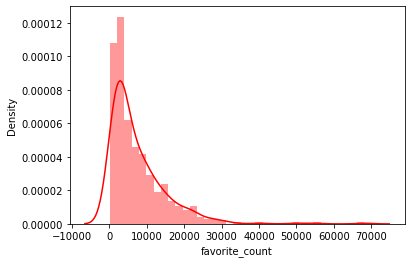

In [229]:
# To plot the distribution of favorite_count
sns.distplot(twitter_archive_master.favorite_count, color = 'red', label = 'Favorites')

**fig 1.0 the plot above shows the distribution of favourite_count in the dataset**

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='retweet_count', ylabel='Density'>

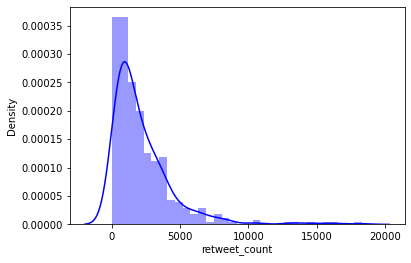

In [230]:
# To plot the distribution of retweet_count
sns.distplot(twitter_archive_master.retweet_count, color = 'blue', label = 'Retweets')

**fig 2.0 the plot above shows the distribution of retweet_count in the dataset**

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='retweet_count', ylabel='Density'>

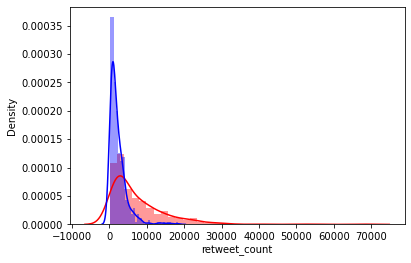

In [231]:
# To plot the distribution of favorite_count and retweet_count 
sns.distplot(twitter_archive_master.favorite_count, color = 'red', label = 'Favorites')
sns.distplot(twitter_archive_master.retweet_count, color = 'blue', label = 'Retweets')

**fig 3.0 the plot above shows the distribution of retweet_count and favourite_count in the dataset**

<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

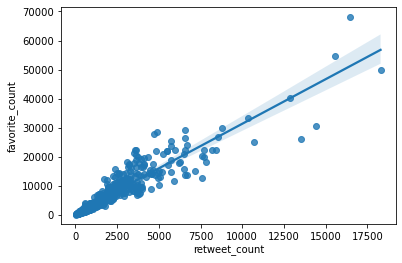

In [232]:
# This plot is for checking the linear relationship between retweet count and Favorite count
sns.regplot(x=twitter_archive_master.retweet_count, y=twitter_archive_master.favorite_count)

**fig 4.0 the plot above show the linear relationship between retweet_count and favourite_count**

In [233]:
# ploting using the date data in the dataset
twitter_archive_master.set_index('date_x', inplace=True)

<AxesSubplot:xlabel='date_x'>

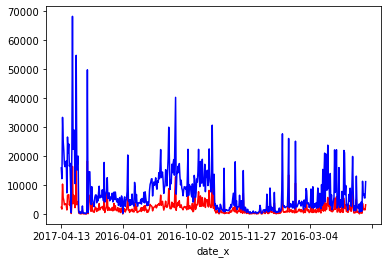

In [234]:
# This code is to Plot favorite_count and retweet_count over a period of time
twitter_archive_master['retweet_count'].plot(color = 'red', label='Retweets')
twitter_archive_master['favorite_count'].plot(color = 'blue', label='Favorites')

**fig 5.0 the plot above shows the impact of favourite_count and retweet-count over a period of time**

<AxesSubplot:xlabel='rating_number', ylabel='favorite_count'>

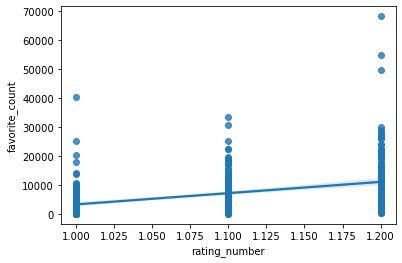

In [235]:
sns.regplot(x=twitter_archive_master.rating_number, y=twitter_archive_master.favorite_count)

**fig 6.0 plot above show the linear relationship between favourite_count and rating_number**

<AxesSubplot:xlabel='rating_number', ylabel='retweet_count'>

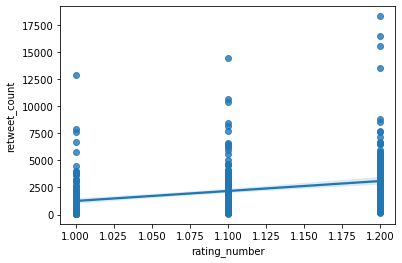

In [236]:
sns.regplot(x=twitter_archive_master.rating_number, y=twitter_archive_master.retweet_count)

**fig 7.0 plot above show the linear relationship between retweet_count and rating_numbers**

<li><a href="#conclusions">CONCLUSION</a></li>

- From the above analysis it can be concluded that Dog prediction 2 has the highest Prediction confidence followed by Dog prediction 1
- Pupper has the highest retweet count followed by doggo while floofer has the lowest retweet count
- On prediction image 1-3 the followings are the top 2 image predicted:
    - Labrador_retriever
    - Golden_retriever
- The highest retweet count was recorded on 2015-11-23 
- Golden_retriever has the highest favorite count on prediction image 1 & 2 while Labrador_retriever has the highest favorite count on Prediction image 3  

<li><a href="#limitation">LIMITATIONS</a></li>

- One of the Limitation of the analysis is getting API permission which was declined
- Also inconsistency in the regex used to code the dataset in some of the column which makes it difficult to extract name from the text.

<li><a href="#references">REFERENCES</a></li>

The following are the references for this project:-


1. Udaccity Nano Degree Program course materials

2. stackoverflow.com

3. Data Science made Simple website.

5. geeksforgeeks.org

6. phoenixnap.com
 

